# Influence of Loan features on BorrowerAPR
## by Nonso Udechukwu

## Investigation Overview

For this investigation, I investigate features that influence BorrowerAPR, the total fees a borrower pays annually on a loan. Main features assessed were ProsperRating, Homeownership, StatedMonthlyIncome, and Loan Term.


## Dataset Overview

This dataset is from Prosper, a top marketplace lending platform in the United States. It contains 113,937 loan records with 81 features, including loan data (e.g. loan amount, borrower rate, current loan status), borrower data (e.g. borrower income, employment status, and credit history), and credit risk data (e.g. ProsperScore). I selected a subset of the dataset, using only 20 features out of the original 81. Due to missing data and other inconsistencies, the final subset dataframe contained 65% (76754) of the listings on the original dataset.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# Load the subsetProsper Loan data into a pandas dataframe
loan_df = pd.read_pickle("ProsperLoanSubset.pkl")


# Set color for all univariate plots
colors = sns.color_palette('Paired')

# Print the head of the data set
loan_df.head()

,ListingNumber,ListingCategory,LoanOriginalAmount,Term,LoanStatus,IncomeRange,StatedMonthlyIncome,MonthlyLoanPayment,ProsperRating,BorrowerRate,BorrowerAPR,EmploymentStatus,Occupation,EmploymentStatusDuration,DebtToIncomeRatio,AvailableBankcardCredit,IsBorrowerHomeowner,CurrentDelinquencies,DelinquenciesLast7Years,LoanOriginationYear
1,1209647,2,10000,36,Current,"$50,000-74,999",6125.0,318.93,A,0.0920,0.12016,Employed,Professional,44.0,0.18,10266.0,Not Homeowner,0.0,0.0,2014
3,658116,16,10000,36,Current,"$25,000-49,999",2875.0,321.45,A,0.0974,0.12528,Employed,Skilled Labor,113.0,0.15,30754.0,Homeowner,4.0,14.0,2012
4,909464,2,15000,36,Current,"$100,000+",9583.0,563.97,D,0.2085,0.24614,Employed,Executive,44.0,0.26,695.0,Homeowner,0.0,0.0,2013
5,1074836,1,15000,60,Current,"$100,000+",8333.0,342.37,B,0.1314,0.15425,Employed,Professional,82.0,0.36,86509.0,Homeowner,0.0,0.0,2013
6,750899,1,3000,36,Current,"$25,000-49,999",2083.0,122.67,E,0.2712,0.31032,Employed,Sales - Retail,172.0,0.27,1929.0,Not Homeowner,0.0,0.0,2013


## Distribution of BorrowerAPR

BorrowerAPR appears multimodal, with peaks at 0.13, 0.2, 0.3, and a very sharp peak at 0.35. Most listings have BorrowAPR below 0.40

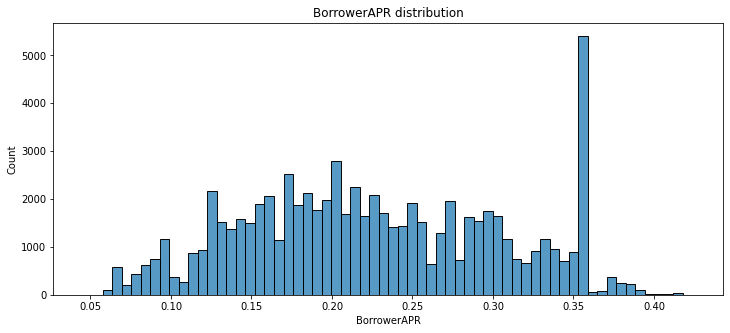

In [3]:
plt.figure(figsize=[12, 5])

g = sns.histplot(loan_df['BorrowerAPR'], color=colors[1]);
g.set_title('BorrowerAPR distribution');
plt.show()

## BorrowerAPR vs Prosper Rating

Prosper Rating appears strongly negatively correlated with BorrowerAPR. The better a borrower's Prosper Rating, the lesser the cost of the loan.

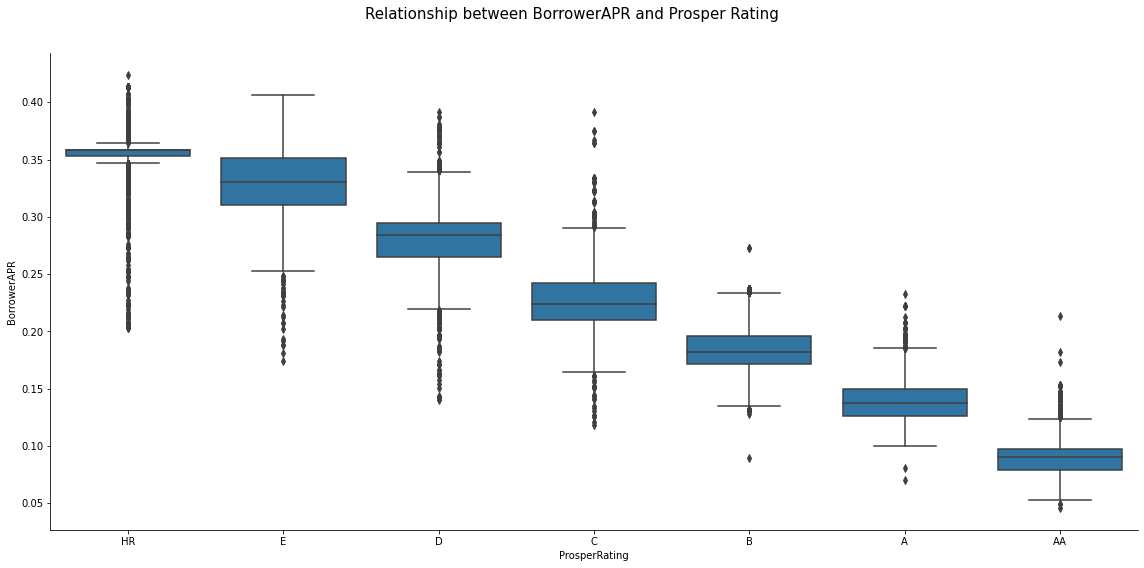

In [4]:
#sns.boxplot(data=loan_sub, x='ProsperRating (Alpha)', y='BorrowerAPR', color=default_color)
#plt.xlabel('Prosper Rating')
#plt.ylabel('Borrower APR')
#plt.title('Borrower APR vs. Prosper Rating');

g = sns.catplot(data=loan_df, x='ProsperRating', y='BorrowerAPR', color=colors[1], kind='box', height=8,
                 aspect = 10/5)
g.fig.subplots_adjust(top=0.9) # adjust the figure
g.fig.suptitle('Relationship between BorrowerAPR and Prosper Rating', fontsize=15);

## Compare BorrowerAPR across Prosper Rating and Loan Terms
Borrowers are likelier to pay more BorrowerAPR for short-term loans than longer-term loans UNLESS they are rated B and above. In which case, longer-term loans become costlier than shorter-term loans. 

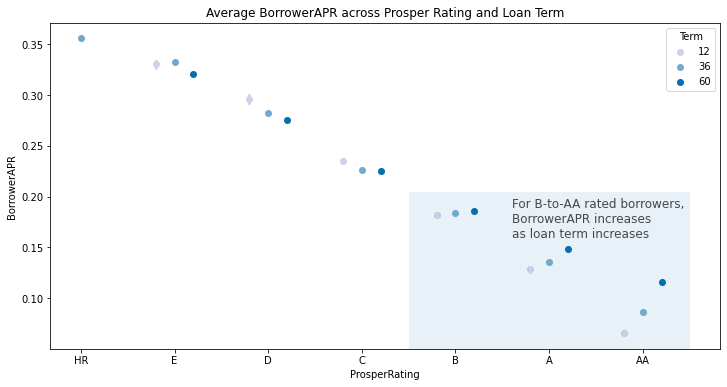

In [8]:
plt.figure(figsize=[12, 6])

g = sns.pointplot(data=loan_df, x='ProsperRating', y='BorrowerAPR', hue='Term', linestyles='',
              palette= 'PuBu', dodge=0.4, scale=0.8)

# Annotate the changes in BorrowerAPR for higher-rated borrowers across loan terms
plt.axvspan(xmin=3.5, xmax=6.5, ymax=0.48, alpha=0.1)
plt.text(x=4.6, y=0.16, fontsize=12, alpha=0.7,
         s='For B-to-AA rated borrowers,\nBorrowerAPR increases\nas loan term increases')

g.set_title('Average BorrowerAPR across Prosper Rating and Loan Term');

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert <Part_II_Filename>.ipynb --to slides --post serve --no-input --no-prompt